### **Equipo 79**
### **TEAM DSR**
## Reto Banorte
## Modelo de nowcasting para pronosticar la variación anual de la inflación general y subyacente de la 1° Quin. Enero 2021 a la 1° Quin. Agosto 2021
# Creado por: David Martínez Celis, Sofía Sampogna, Ricardo González

# Importación de datos

Aquí importamos las librerias de numpy, pandas, y matplotlib para poder analizar y usar nuestros datos para conseguir resultados.

In [ ]:
from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression #only importing the linear_model function
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


Saving quincenal_5.csv to quincenal_5.csv
User uploaded file "quincenal_5.csv" with length 39985 bytes


# Lectura de Datos

Igualmente importamos a la libreria de seaborn, y leemos nuestro documento con los datos en un .csv, lo cual es representado por variacion_df.

In [ ]:
import seaborn as sns
sns.set()

variacion_df = pd.read_csv('/content/quincenal_5.csv')
#presion_df = presion_df.drop(columns="Unnamed: 1")
#presion_df = presion_df.drop(columns="Unnamed: 2")
variacion_df

,fecha,variacion,670507,670508,670509,670510
0,1,0.00,NaN,NaN,NaN,NaN
1,2,1.00,NaN,NaN,NaN,NaN
2,3,1.55,NaN,NaN,NaN,NaN
3,4,1.58,NaN,NaN,NaN,NaN
4,5,1.58,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
802,803,0.34,108.438562,106.829781,112.614393,109.877314
803,804,0.20,109.342616,107.593642,113.882336,111.095197
804,805,0.37,109.342616,107.593642,113.882336,111.095197
805,806,0.24,109.921511,107.979073,114.963397,111.228510


# Modelo de Regresión Lineal

Ponemos nuestros datos del eje x (fechas) en la variable x1 y los datos del eje y (variacion) en la variable y1. Igualmente conseguimos nuestros valores de m y b para la ecuación de la regresión lineal. 

In [ ]:
x1 = variacion_df.loc[:,'fecha']
y1 = variacion_df.loc[:,'variacion']

m, b = np.polyfit(x1, y1, 1)
print("m =",m)
print("b =",b)

m = -0.0009576758177630378
b = 0.760370671020629


In [ ]:
num_obs = 50

noise = np.random.normal(loc=0.0, scale=5.0, size=num_obs)

Desplegamos nuestros datos en un scatter plot. 

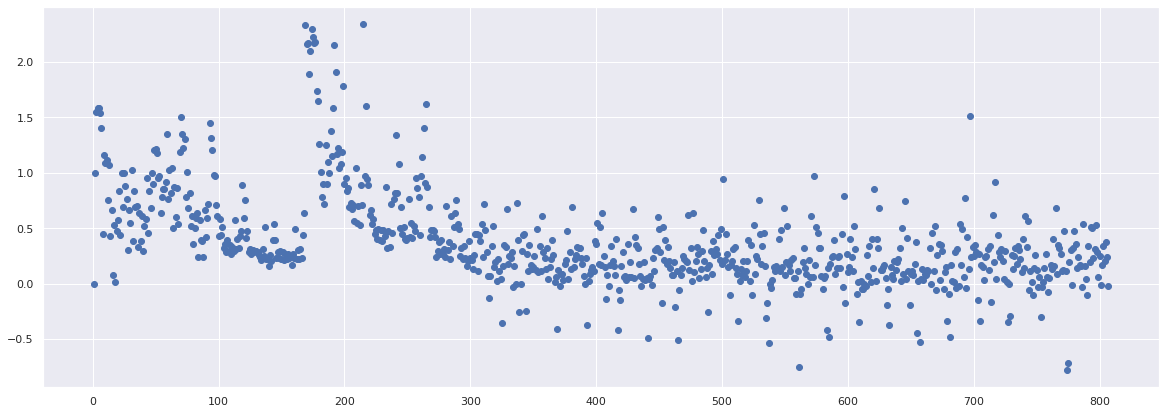

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(x1, y1, 'o')

Usamos las funciones para calcular la regresión lineal de nuestros datos, la cual usaremos para desplegar la linea junto con el scatter plot.

In [ ]:
features = x1.values.reshape(-1, 1)
target = y1

lr = LinearRegression()
lr.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr.intercept_)
print(lr.coef_)

0.760370671020629
[-0.00095768]


Desplegamos los datos. 

Text(0.5, 1.0, 'Grafica de y = -0.0011537753738827213x + 0.8603511519244267')

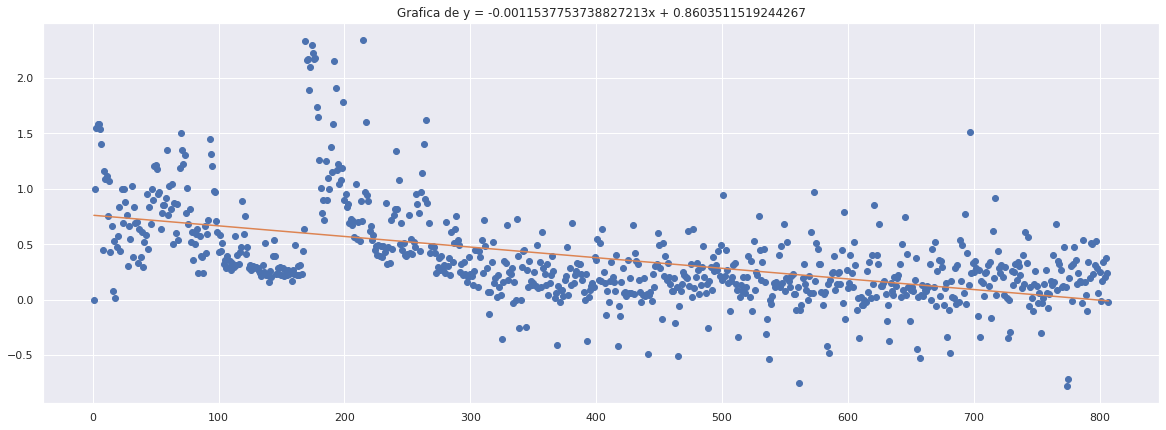

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(x1, y1, 'o')

x_chart = np.linspace(x1.min(), x1.max(), num=100)
plt.plot(x_chart, lr.intercept_ + lr.coef_[0]*x_chart)
plt.title('Grafica de y = -0.0011537753738827213x + 0.8603511519244267')

Predicciones del 2021 utilizando nuestros datos y la regresión lineal.

In [ ]:
#use the equation to predict
x_new = np.array([794, 795, 796])

y_prediction = lr.intercept_ + x_new*lr.coef_[0]
y_prediction

# use model to predict
lr.predict(x_new.reshape(-1,1))

array([-2.39282832e-05, -9.81604101e-04, -1.93927992e-03])

Training Test para conseguir unas mejores predicciones de nuestros datos. 793 representa cuando termina 2020, y empieza 2021, lo cual significa que son los valores que estamos prediciendo. 

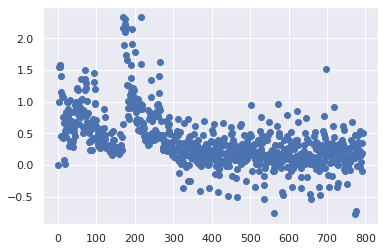

In [ ]:
train_x = x1[:793]
train_y = y1[:793]

test_x = x1[793:]
test_y = y1[793:]

plt.scatter(train_x, train_y)
plt.show()


Valores de 2021.

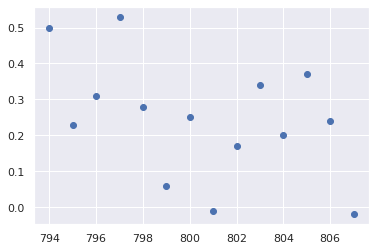

In [ ]:
plt.scatter(test_x, test_y)
plt.show()

Graficación de scatter plot junto con nuestra linea con el Train_x y Train_y

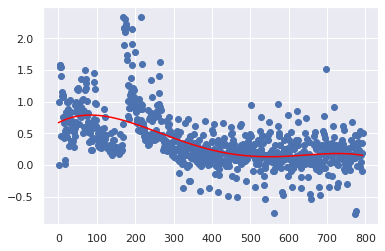

In [ ]:
mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))
myline = np.linspace(0, 793, 793)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline), color = 'red')
plt.show()

Nuestro valor final de r^2

In [ ]:

r2 = r2_score(train_y, mymodel(train_x))
print(r2)

0.3303782192830963
